In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
# Drop rows with any missing/null values
df.dropna(inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Display count of null values in each column before dropping
null_counts = df.isnull().sum()
null_counts

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [7]:
# Data structure
print("Shape of the dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

Shape of the dataset: (4909, 17)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   gender_Male                     4909 non-null   bool   
 7   gender_Other                    4909 non-null   bool   
 8   ever_married_Yes                4909 non-null   bool   
 9   work_type_Never_worked          4909 non-null   bool   
 10  work_type_Private               4909 non-null   bool   
 11  work_type_Self-employed      

In [8]:
# Numeric summary
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# Class distribution
print("Stroke class distribution:")
print(df['stroke'].value_counts(normalize=True))

Stroke class distribution:
stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

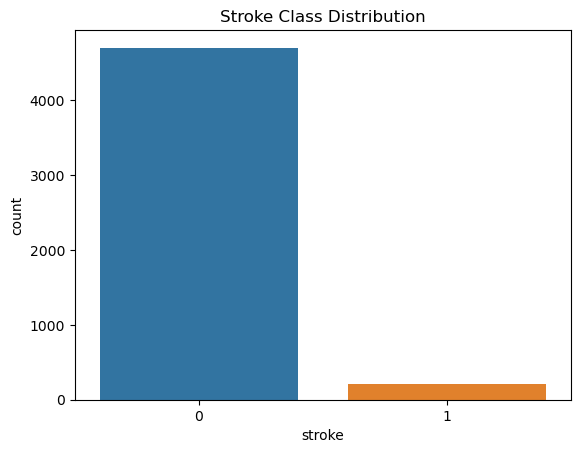

In [11]:
sns.countplot(data=df, x='stroke')
plt.title('Stroke Class Distribution')
plt.show()

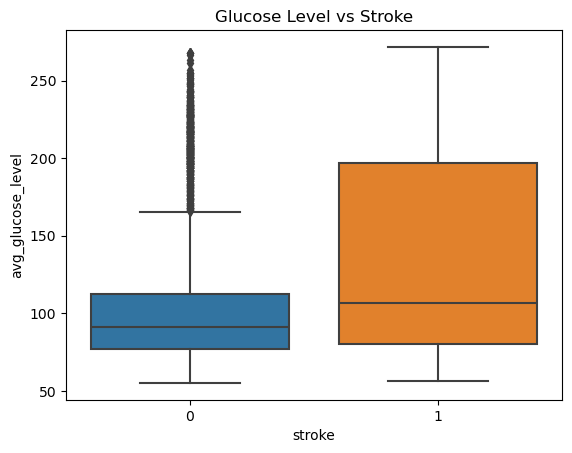

In [12]:
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title('Glucose Level vs Stroke')
plt.show()

C:\Users\JerrY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


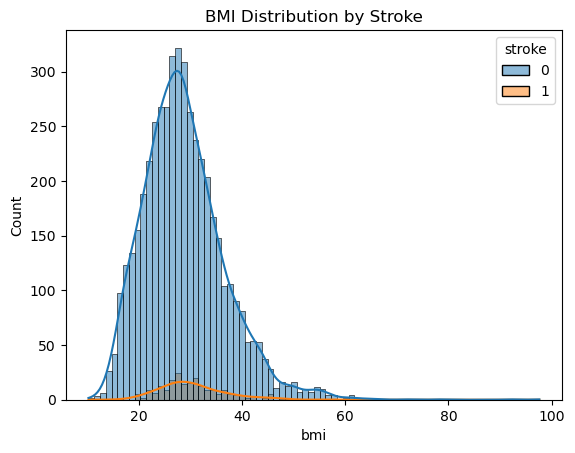

In [13]:
sns.histplot(data=df, x='bmi', hue='stroke', kde=True)
plt.title('BMI Distribution by Stroke')
plt.show()

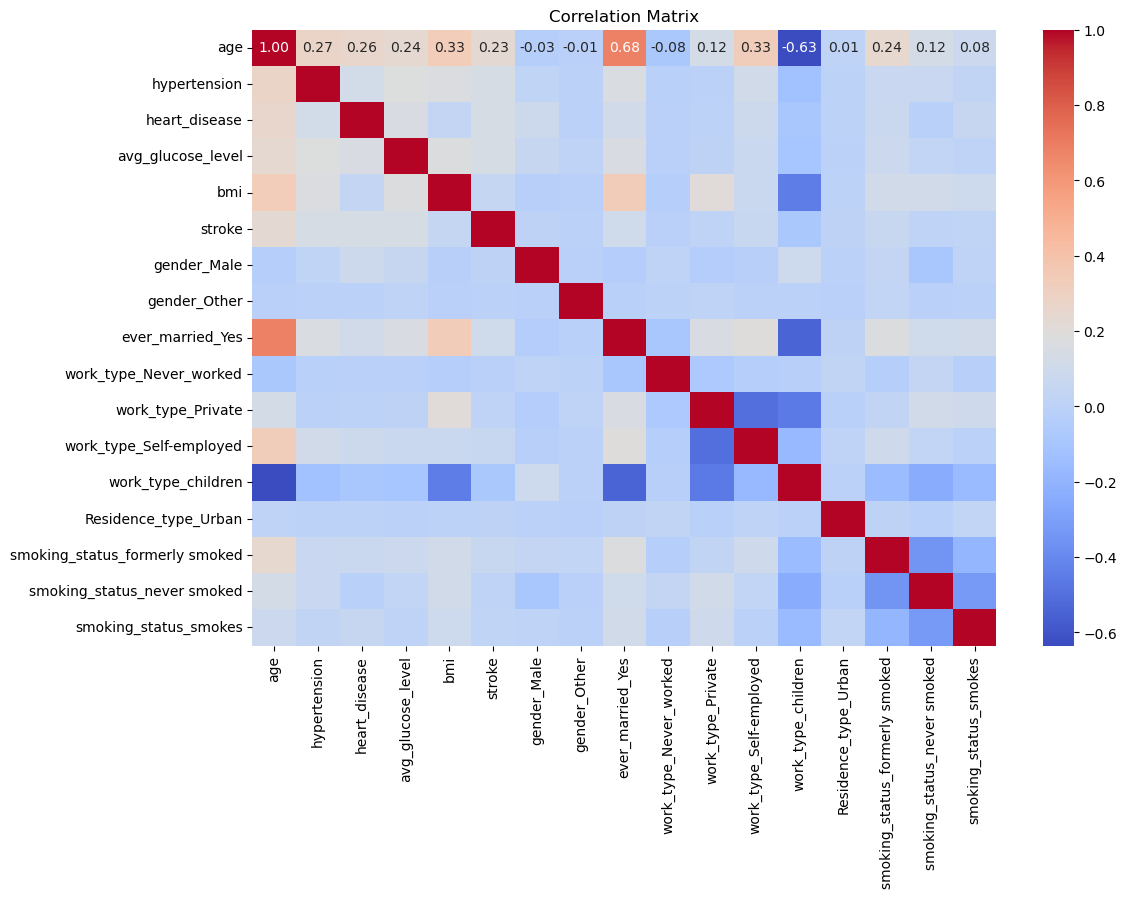

In [14]:
# Encode categorical variables for correlation
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
# Stratify ensures the class distribution is preserved in both sets

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=12
)

In [16]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic samples for the minority class
# This helps balance the training set

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [17]:
from sklearn.preprocessing import StandardScaler

# Scale features to standard normal distribution (mean=0, std=1)
# This is important for models like SVM and logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train_resampled)

# Make predictions
pred_rf = model_rf.predict(X_test_scaled)

# Evaluate
print("Random Forest")
print("Accuracy :", accuracy_score(y_test, pred_rf))
print("Precision:", precision_score(y_test, pred_rf))
print("Recall   :", recall_score(y_test, pred_rf))

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_rf))

Random Forest
Accuracy : 0.9338085539714868
Precision: 0.12903225806451613
Recall   : 0.09523809523809523

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       940
           1       0.13      0.10      0.11        42

    accuracy                           0.93       982
   macro avg       0.54      0.53      0.54       982
weighted avg       0.92      0.93      0.93       982



In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train the model
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_scaled, y_train_resampled)

# Make predictions
pred_svm = model_svm.predict(X_test_scaled)

# Evaluate
print("SVM")
print("Accuracy :", accuracy_score(y_test, pred_svm))
print("Precision:", precision_score(y_test, pred_svm))
print("Recall   :", recall_score(y_test, pred_svm))

# Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_svm))

SVM
Accuracy : 0.8737270875763747
Precision: 0.12727272727272726
Recall   : 0.3333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       940
           1       0.13      0.33      0.18        42

    accuracy                           0.87       982
   macro avg       0.55      0.62      0.56       982
weighted avg       0.93      0.87      0.90       982

